<a href="https://colab.research.google.com/github/SaraKarim23/PART_2-RHESSI-Mission-Data-to-Identify-Solar-Flare/blob/main/PART2_RHESSI_Mission_Data_to_Identify_Solar_Flare_Peak_Times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
%matplotlib inline

# To ensure python2 and python3 compatability
from __future__ import division, print_function

# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Setting plot display parameters
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_style('darkgrid')

# Suppress warnings display
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('/content/drive/MyDrive/MSc/Solar /hessi.solar.flare.2002to2016.csv',sep=",")
df.head(3)

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN


In [42]:
df.isnull().sum()


flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              60951
dtype: int64

In [44]:
new_df = pd.read_csv('/content/drive/MyDrive/MSc/Solar /hessi.solar.flare.2002to2016.csv',sep=",", index_col=0)

# process date / time columns
def parse_date(sdatex,stimex):
    datex = datetime.strptime(sdatex, '%Y-%m-%d')
    timex = datetime.strptime(stimex, '%H:%M:%S')
    return datetime(datex.year,datex.month,datex.day,timex.hour,timex.minute,timex.second)

# Adding year, month, day, start date, peak date, end date and dropping earlier columns
new_df['dt.start'] = new_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.peak'] = new_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.end'] = new_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)

# clean columns
new_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)

# add new columns
new_df['year'] = new_df['dt.start'].apply(lambda col: col.year)
new_df['month'] = new_df['dt.start'].apply(lambda col: col.month)
new_df['day'] = new_df['dt.start'].apply(lambda col: col.day)

In [45]:
new_df.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2',
       'flag.3', 'flag.4', 'flag.5', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day'],
      dtype='object')

In [46]:
new_df = new_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'_flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})

In [47]:
new_df.head(3)

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,_flag_5,date_start,date_peak,date_end,year,month,day
flare,,,,,,,,,,,,,,,,,,,
2021213,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
2021228,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2021332,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [48]:
DATA_by_yr = new_df.groupby(['year'])['total_counts'].sum()
DATA_by_month = new_df.groupby(['month'])['total_counts'].sum().sort_values(ascending=False)
DATA_vs_energy = new_df.groupby(['energy_kev'])['energy_kev'].count().sort_values(ascending=True)

In [49]:
'''Selecting 1000 rows and 4 coulmns from new dataframe for plots
    and finding value distribution and relation'''
data_part = new_df.iloc[1:1000, 0:4]

In [50]:
data_part.columns

Index(['duration_s', 'peak_c_s', 'total_counts', 'energy_kev'], dtype='object')


# **Relation between Flare duration, Peak count rate and Total count with respect to Energy**

Majority of the flares are of the energy range 6-12 KeV. Another small majority of flares are of range 12-25 KeV. Flares having energies greater than range 25-50 KeV are very sparse and rare in occurrence.


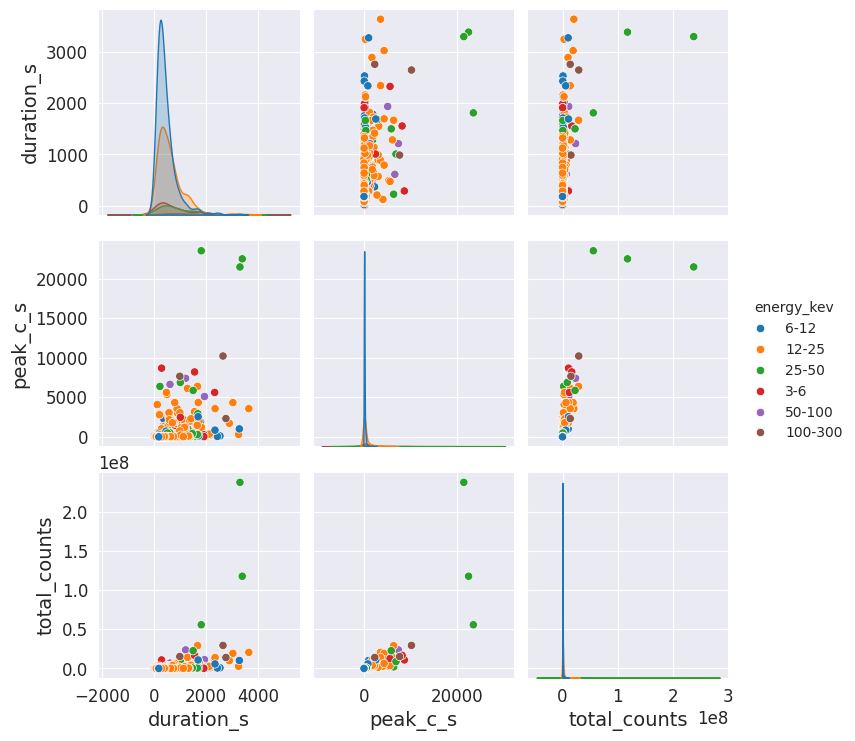

In [51]:
sns.pairplot(data=data_part, hue='energy_kev', vars=['duration_s', 'peak_c_s', 'total_counts'])

# **Density plot to visualize the distribution of the Flare wrt. Energy**

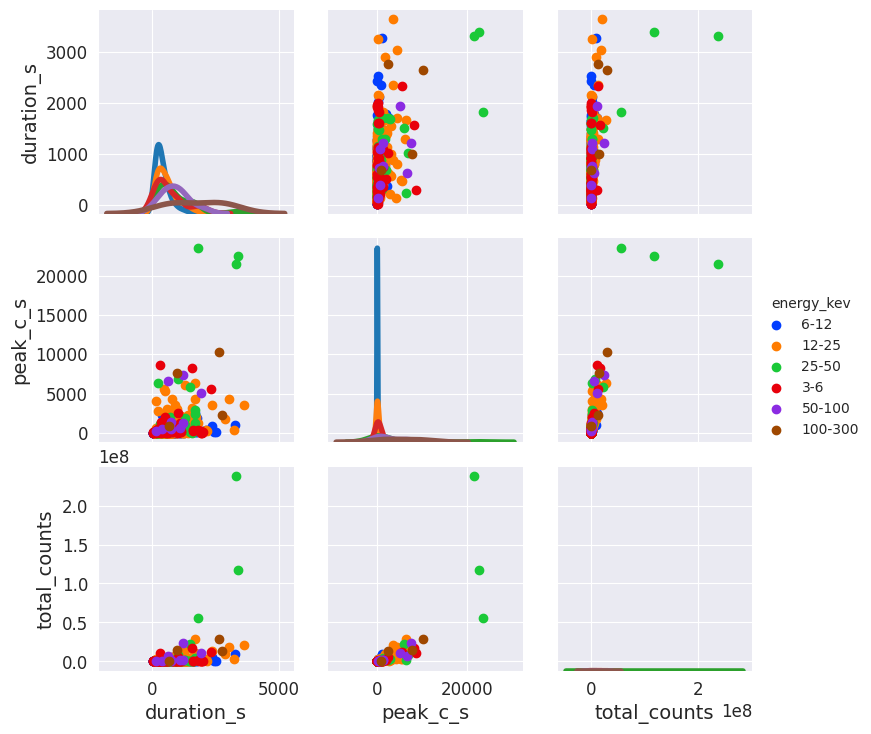

In [53]:
g =  sns.PairGrid(data_part, hue='energy_kev', palette='bright')

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs, linewidth=4)

g.map_diag(f)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()



# **Countplot to Visualize distribution of flares in the different energy ranges**

The countplot visualizes the distribution of flares from the data_part dataframe(having 1000 rows of the entire dataset). We see that the 6-12 KeV energy range dominates all the other value range. We assume the same trend continues for the entire dataset.


Text(0, 0.5, 'Energy Density Range (KeV)')

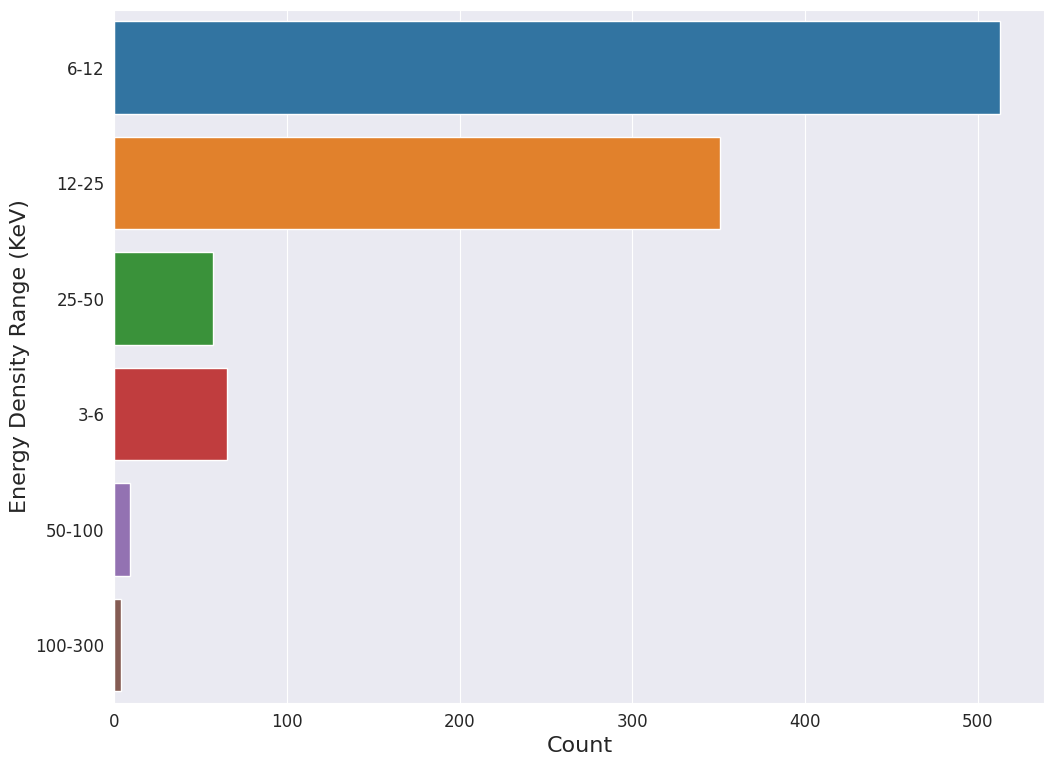

In [54]:
sns.countplot(y='energy_kev', data=data_part, hue='energy_kev')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Energy Density Range (KeV)', fontsize=16)

**Countplot on the entire dataset to verify assumption**

Text(0, 0.5, 'Energy Density Range (KeV)')

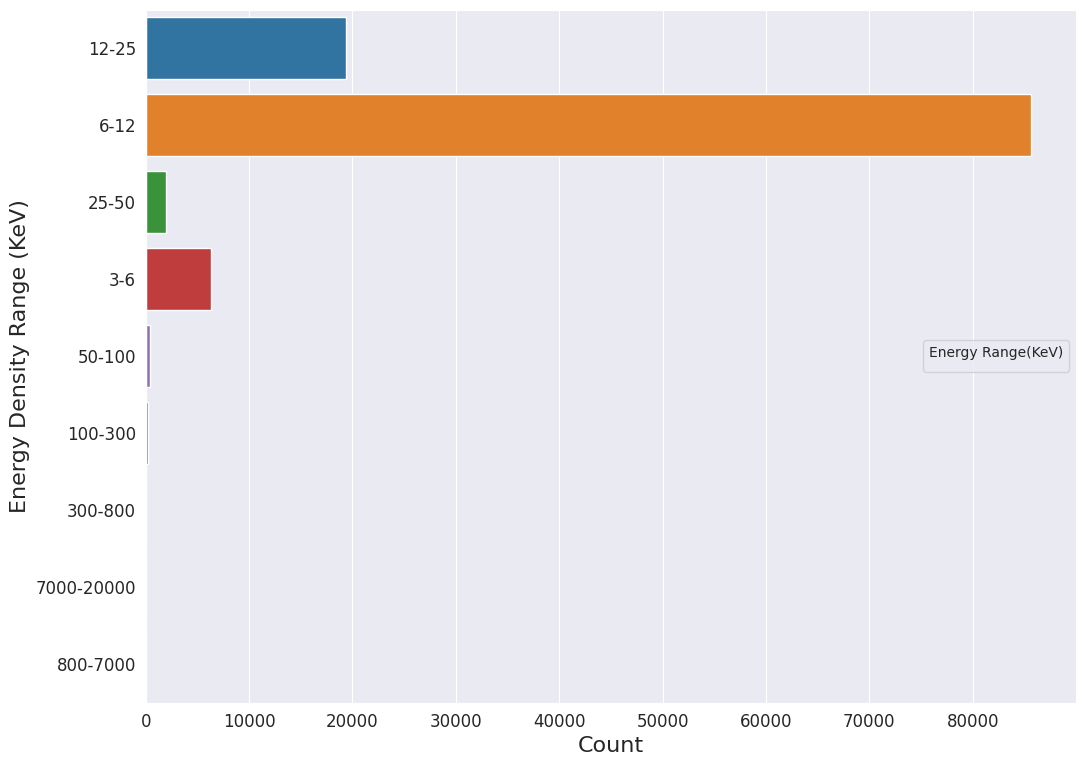

In [55]:
sns.countplot(y='energy_kev', data=new_df, hue='energy_kev')
plt.legend(title='Energy Range(KeV)', loc='right', prop={'size': 10})
plt.xlabel('Count', fontsize=16)
plt.ylabel('Energy Density Range (KeV)', fontsize=16)

We hence confirm our assumption by plotting a countplot on the entire dataset. A majority of flares appear in the energy range of 6-12 KeV, followed by the 12-25 KeV range.


# **Relation between Energy density and Duration(in seconds)**

The plot uses only thousand rows(data_part dataframe). We infer that short duration pulses are having high energy density.


Text(0, 0.5, 'Energy Density')

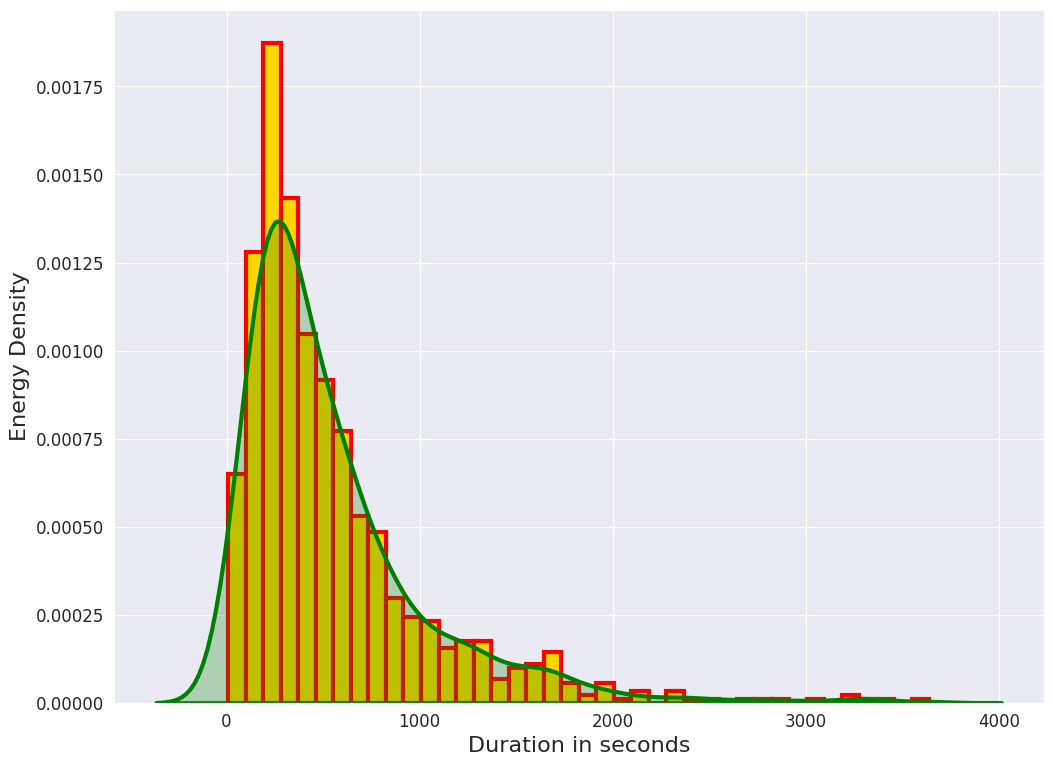

In [56]:
sns.distplot(data_part['duration_s'], kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold', edgecolor='red', lw=3))
plt.xlabel('Duration in seconds', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

### **Histogram and Density Curve of Flare Duration**

Text(0, 0.5, 'Energy Density')

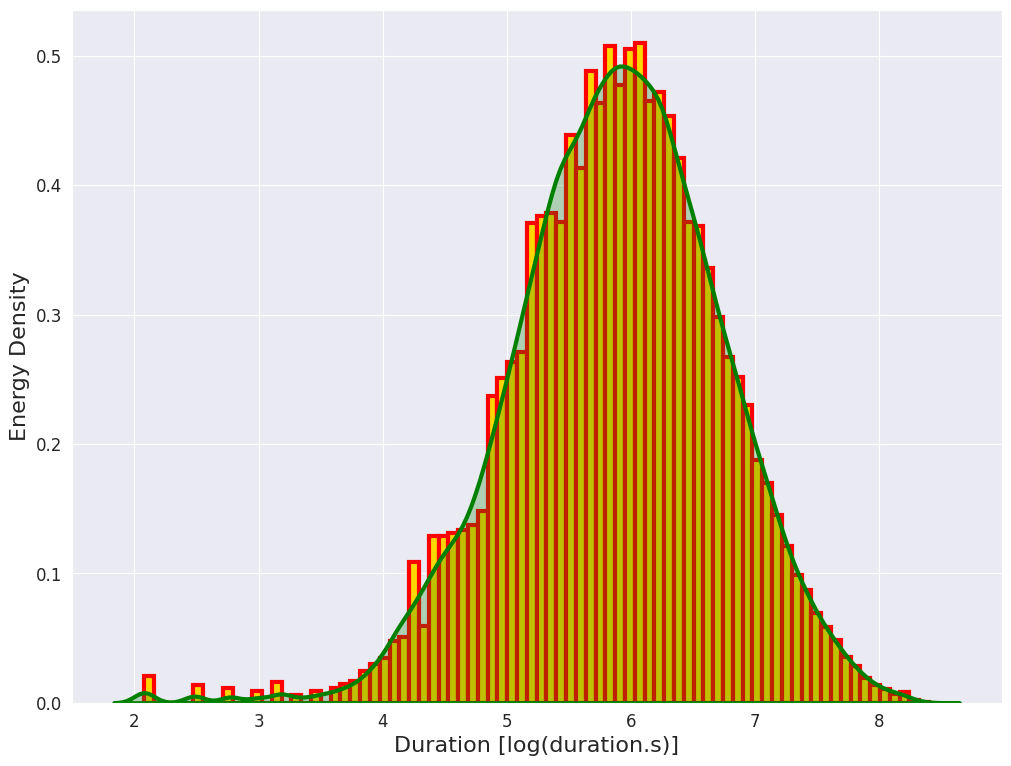

In [57]:
df['duration_s_log'] = np.log(df['duration.s'])
sns.distplot(df['duration_s_log'], bins=80, kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold',edgecolor='red', lw=3))
plt.xlabel('Duration [log(duration.s)]', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

### **Relation between Radial values and the total count of flares**

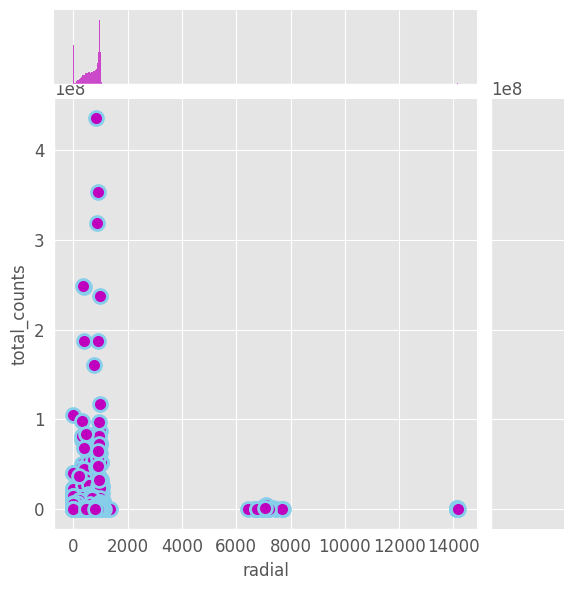

In [58]:
plt.style.use('ggplot')
sns.jointplot(x=new_df['radial'], y=new_df['total_counts'], color='m', kind='scatter', s=100, edgecolor="skyblue", linewidth=2)

**Relation between Duration and log(count of flare)**

Text(0.5, 0, 'Energy (KeV)')

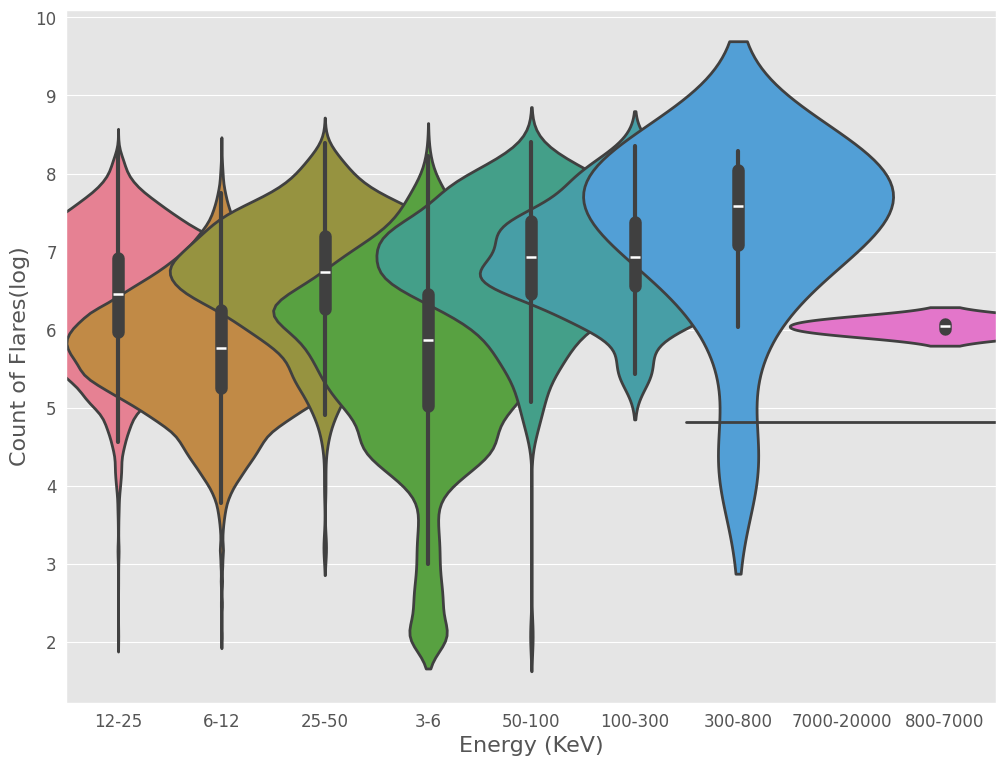

In [59]:
df['flare_log'] = np.log(df['duration.s'])
sns.violinplot(x=df['energy.kev'], y=df['flare_log'], width=3, linewidth=2, hue=df['energy.kev'])
plt.ylabel('Count of Flares(log)', fontsize=16)
plt.xlabel('Energy (KeV)', fontsize=16)

### **Distribution of flares over time duration (in seconds) wrt. Energies**

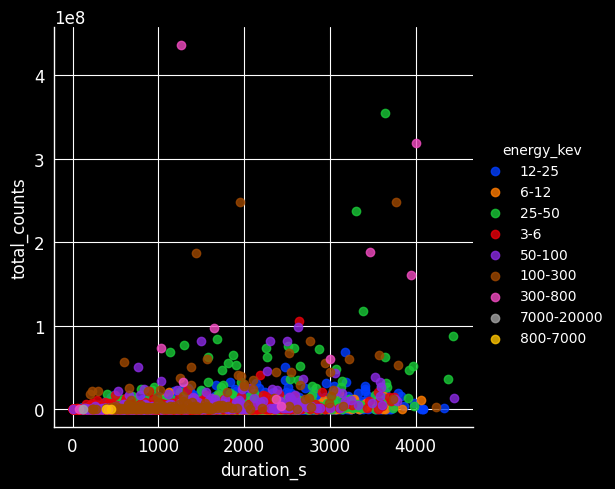

In [60]:
plt.style.use('dark_background')
sns.lmplot(x='duration_s', y='total_counts', hue='energy_kev', fit_reg=False, legend=True, data=new_df, palette='bright')

## Solar Flares trend over the Years (2002-2016)

Text(0, 0.5, 'Solar Flare per Year')

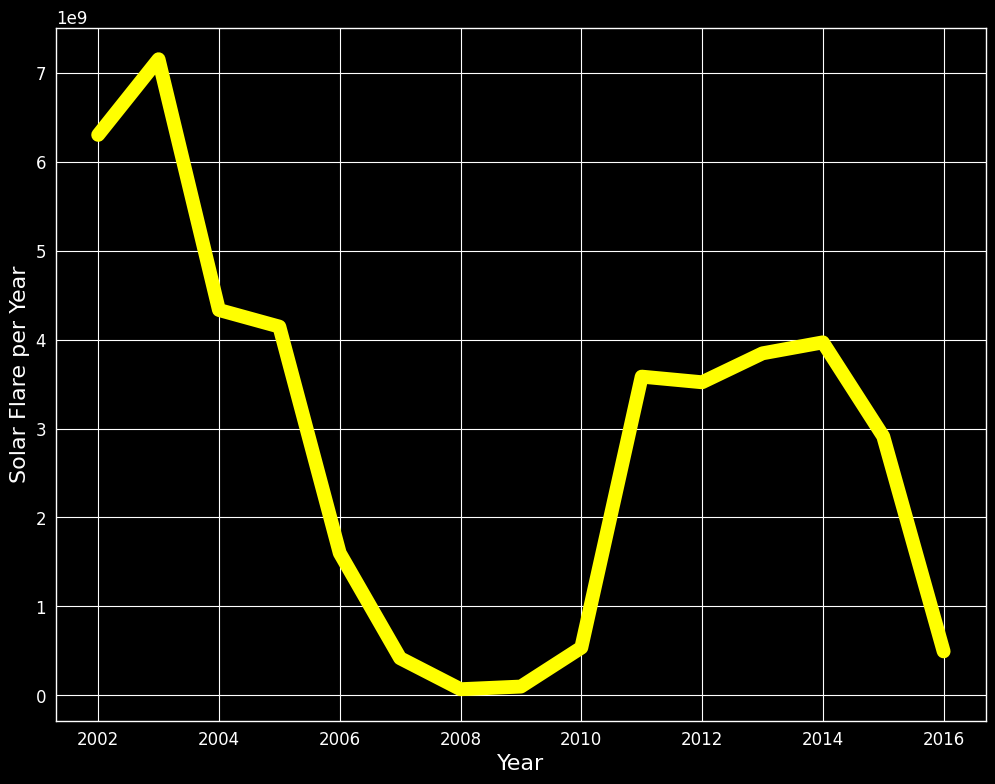

In [61]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, 'yellow', linewidth=10)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Solar Flare per Year', fontsize=16)

Text(0, 0.5, 'Solar Flare per Year')

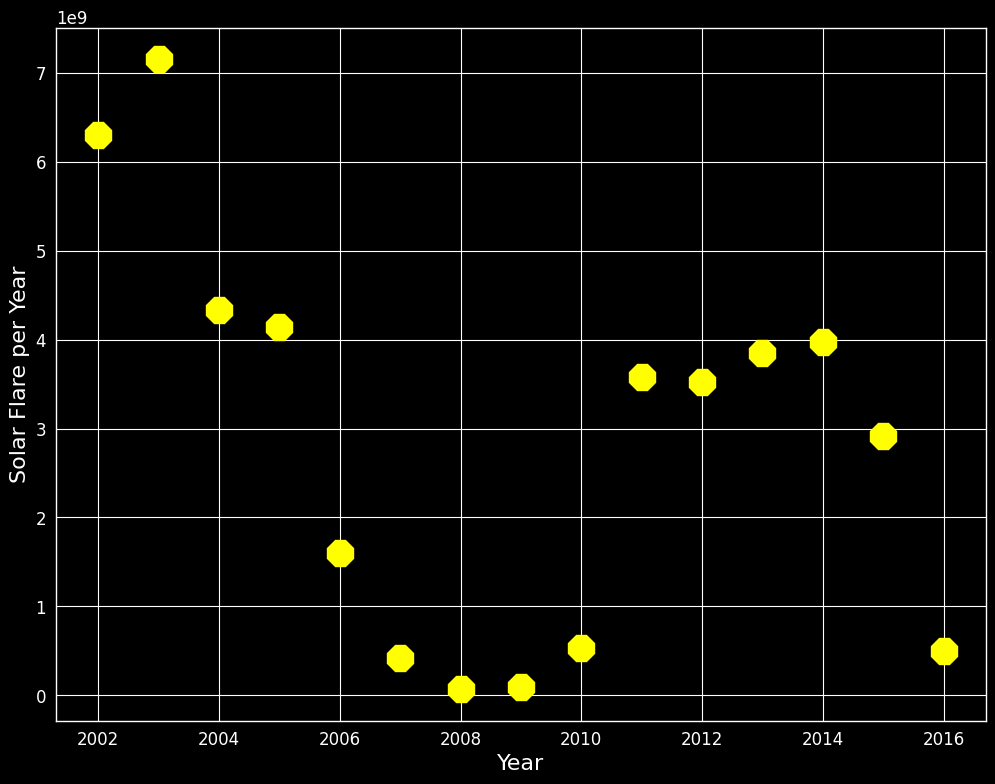

In [62]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, '8', color='yellow', markersize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Solar Flare per Year', fontsize=16)